# APRENDIZAJE AUTOMÁTICO I - PEC 3
El conjunto de datos consiste en un listado de ofertas de alojamientos en la plataforma AirBnB durante 2017.

El objetivo es crear dos modelos, uno de clasificación, y uno de regresión. El primero clasificará alojamientos en función del tipo habitación. El segundo modelará el precio del alojamiento en función del resto de variables.

## Introducción
Primero, se importan las librerias utilizadas

In [1]:
import pandas as pd
import numpy as np

# ML
import sklearn
sklearn.set_config(display="diagram")

# Visualización
import seaborn as sns
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt

# Semilla Aleatoria
semilla_aleatoria = 96

🛑 MODIFICAR EN FUNCION DE LA CARPETA DE ORIGEN DE LOS DATOS

In [2]:
datos = pd.read_csv('./airbnb.csv')

# Parte 1: Clasificación
Modelar el **tipo de habitación** en función del resto de variables.

## 1.1. Creación del conjunto de evaluación



Lo primero de todo es dividir los datos en los conjuntos de entrenamiento y de evaluación. Para ello se analizan las posibles clases de la variable a clasificar.

In [3]:
datos['room_type'].value_counts()

room_type
Entire home/apt    7926
Private room       5203
Shared room         192
Name: count, dtype: int64

Esta variable categórica se corresponde con el tipo de habitación. La opción más popular es la vivienda completa, seguido de habitaciones privadas, y por último, espacios compartidos. Las clases de esta variable no están balanceadas, por lo que se usa un muestreo estratificado. Se guardan/separan un 20% de los datos para la evaluación del modelo.

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(datos, test_size=0.2, stratify=datos["room_type"], random_state=semilla_aleatoria)

El siguiente código muestra que la separación del conjunto de datos en los dos grupos (entrenamiento y evaluación) tienen la misma proporción de cada clase de la variable de interés en el conjunto original.

In [5]:
def room_type_proportions(data):
    return data["room_type"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall %": room_type_proportions(datos),
    "Stratified Train %": room_type_proportions(train_set),
    "Stratified Test %": room_type_proportions(test_set),
}).sort_index()

compare_props.index.name = "Room Type"

(compare_props * 100).round(2)

Overall %  Stratified Train %  Stratified Test %
Room Type                                                        
Entire home/apt      59.50               59.50              59.51
Private room         39.06               39.06              39.06
Shared room           1.44                1.45               1.43

## 1.2. Exploración de los datos
Se inspeccionan los datos numéricos y las otras dos variables categóricas:

In [6]:
datos.head()

neighbourhood_group  neighbourhood   latitude  longitude        room_type  \
0              Centro       Justicia  40.424715  -3.698638  Entire home/apt   
1              Centro    Embajadores  40.413418  -3.706838  Entire home/apt   
2   Moncloa - Aravaca      Argüelles  40.424920  -3.713446  Entire home/apt   
3   Moncloa - Aravaca  Casa de Campo  40.431027  -3.724586  Entire home/apt   
4              Latina       Cármenes  40.403410  -3.740842     Private room   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0     49              28                 35               0.42   
1     80               5                 18               0.30   
2     40               2                 21               0.25   
3     55               2                  3               0.13   
4     16               2                 23               0.76   

   calculated_host_listings_count  availability_365  
0                               1                99  
1                               1               188  
2                               9               195  
3                               9               334  
4                               2               250

Como se ve, no faltan datos de ninguna de las variables:

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             13321 non-null  object 
 1   neighbourhood                   13321 non-null  object 
 2   latitude                        13321 non-null  float64
 3   longitude                       13321 non-null  float64
 4   room_type                       13321 non-null  object 
 5   price                           13321 non-null  int64  
 6   minimum_nights                  13321 non-null  int64  
 7   number_of_reviews               13321 non-null  int64  
 8   reviews_per_month               13321 non-null  float64
 9   calculated_host_listings_count  13321 non-null  int64  
 10  availability_365                13321 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


_neighbourhood_group_ se corresponde con los 21 distritos de Madrid

In [8]:
datos['neighbourhood_group'].value_counts()

neighbourhood_group
Centro                   6773
Chamberí                  960
Salamanca                 883
Arganzuela                790
Tetuán                    463
Moncloa - Aravaca         450
Retiro                    439
Latina                    379
Chamartín                 361
Carabanchel               358
Ciudad Lineal             308
Puente de Vallecas        222
Hortaleza                 185
Fuencarral - El Pardo     170
Usera                     145
San Blas - Canillejas     117
Villaverde                 83
Barajas                    81
Moratalaz                  74
Villa de Vallecas          46
Vicálvaro                  34
Name: count, dtype: int64

_neighbourhood_ se corresponde con los barrios de Madrid

In [9]:
datos['neighbourhood'].value_counts()

neighbourhood
Embajadores       1848
Universidad       1363
Palacio           1084
Sol                942
Justicia           788
                  ... 
Santa Eugenia        4
Hellín               4
Cuatro Vientos       3
Orcasitas            2
El Pardo             1
Name: count, Length: 126, dtype: int64

A continuación se presentan estadísticos descriptivos de todas las variables numéricas. Las medias nos dan una idea de los valores esperados para cada variable.

In [10]:
datos.describe()

latitude     longitude         price  minimum_nights  \
count  13321.000000  13321.000000  13321.000000    13321.000000   
mean      40.420730     -3.697268     69.171834        3.010885   
std        0.020344      0.023832    103.721126       12.835619   
min       40.331888     -3.863907      9.000000        1.000000   
25%       40.410090     -3.707856     31.000000        1.000000   
50%       40.418731     -3.701602     53.000000        2.000000   
75%       40.427997     -3.693818     80.000000        3.000000   
max       40.562736     -3.526821   7700.000000     1125.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       13321.000000       13321.000000                    13321.000000   
mean           22.986037           1.520329                        7.605885   
std            38.406006           1.852367                       19.619972   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.110000                        1.000000   
50%             7.000000           0.780000                        2.000000   
75%            28.000000           2.320000                        4.000000   
max           446.000000          17.210000                      145.000000   

       availability_365  
count      13321.000000  
mean         205.867202  
std          126.968961  
min            0.000000  
25%           84.000000  
50%          247.000000  
75%          321.000000  
max          365.000000

### 1.2.1. Exploración detallada (datos de entrenamiento)
A continuación se estudian correlaciones, se visualizan los datos de entrenamiento, etc. Es decir, se realiza una exploración más detallada.

A priori, no se observa ningúna correlación a destacar entre variables numéricas. Esto lleva a pensar que en un clasificador (probabilístico) bayesiano ingenuo, la condición de independencia entre las variables predictoras no es una suposición muy descabellada.

La mayoría de las variables presentan distribuciones más discretizadas, ya que los posibles valores son números enteros. Esto no implica que sean datos truncados, simplemente indica la naturaleza de los atributos del conjunto de datos. Solo 3 de las variables puede ser números racionales: reseñas mensuales (_reviews_per_month_), latitud y longitud.

Algunas variables presentan distribuciones más asimétricas con colas bastante pronunciadas, ya que tienen valores atípicos. Por ejemplo, el precio o el número mínimo de noches.

🛑 **HIGH COMPUTATION TIME**

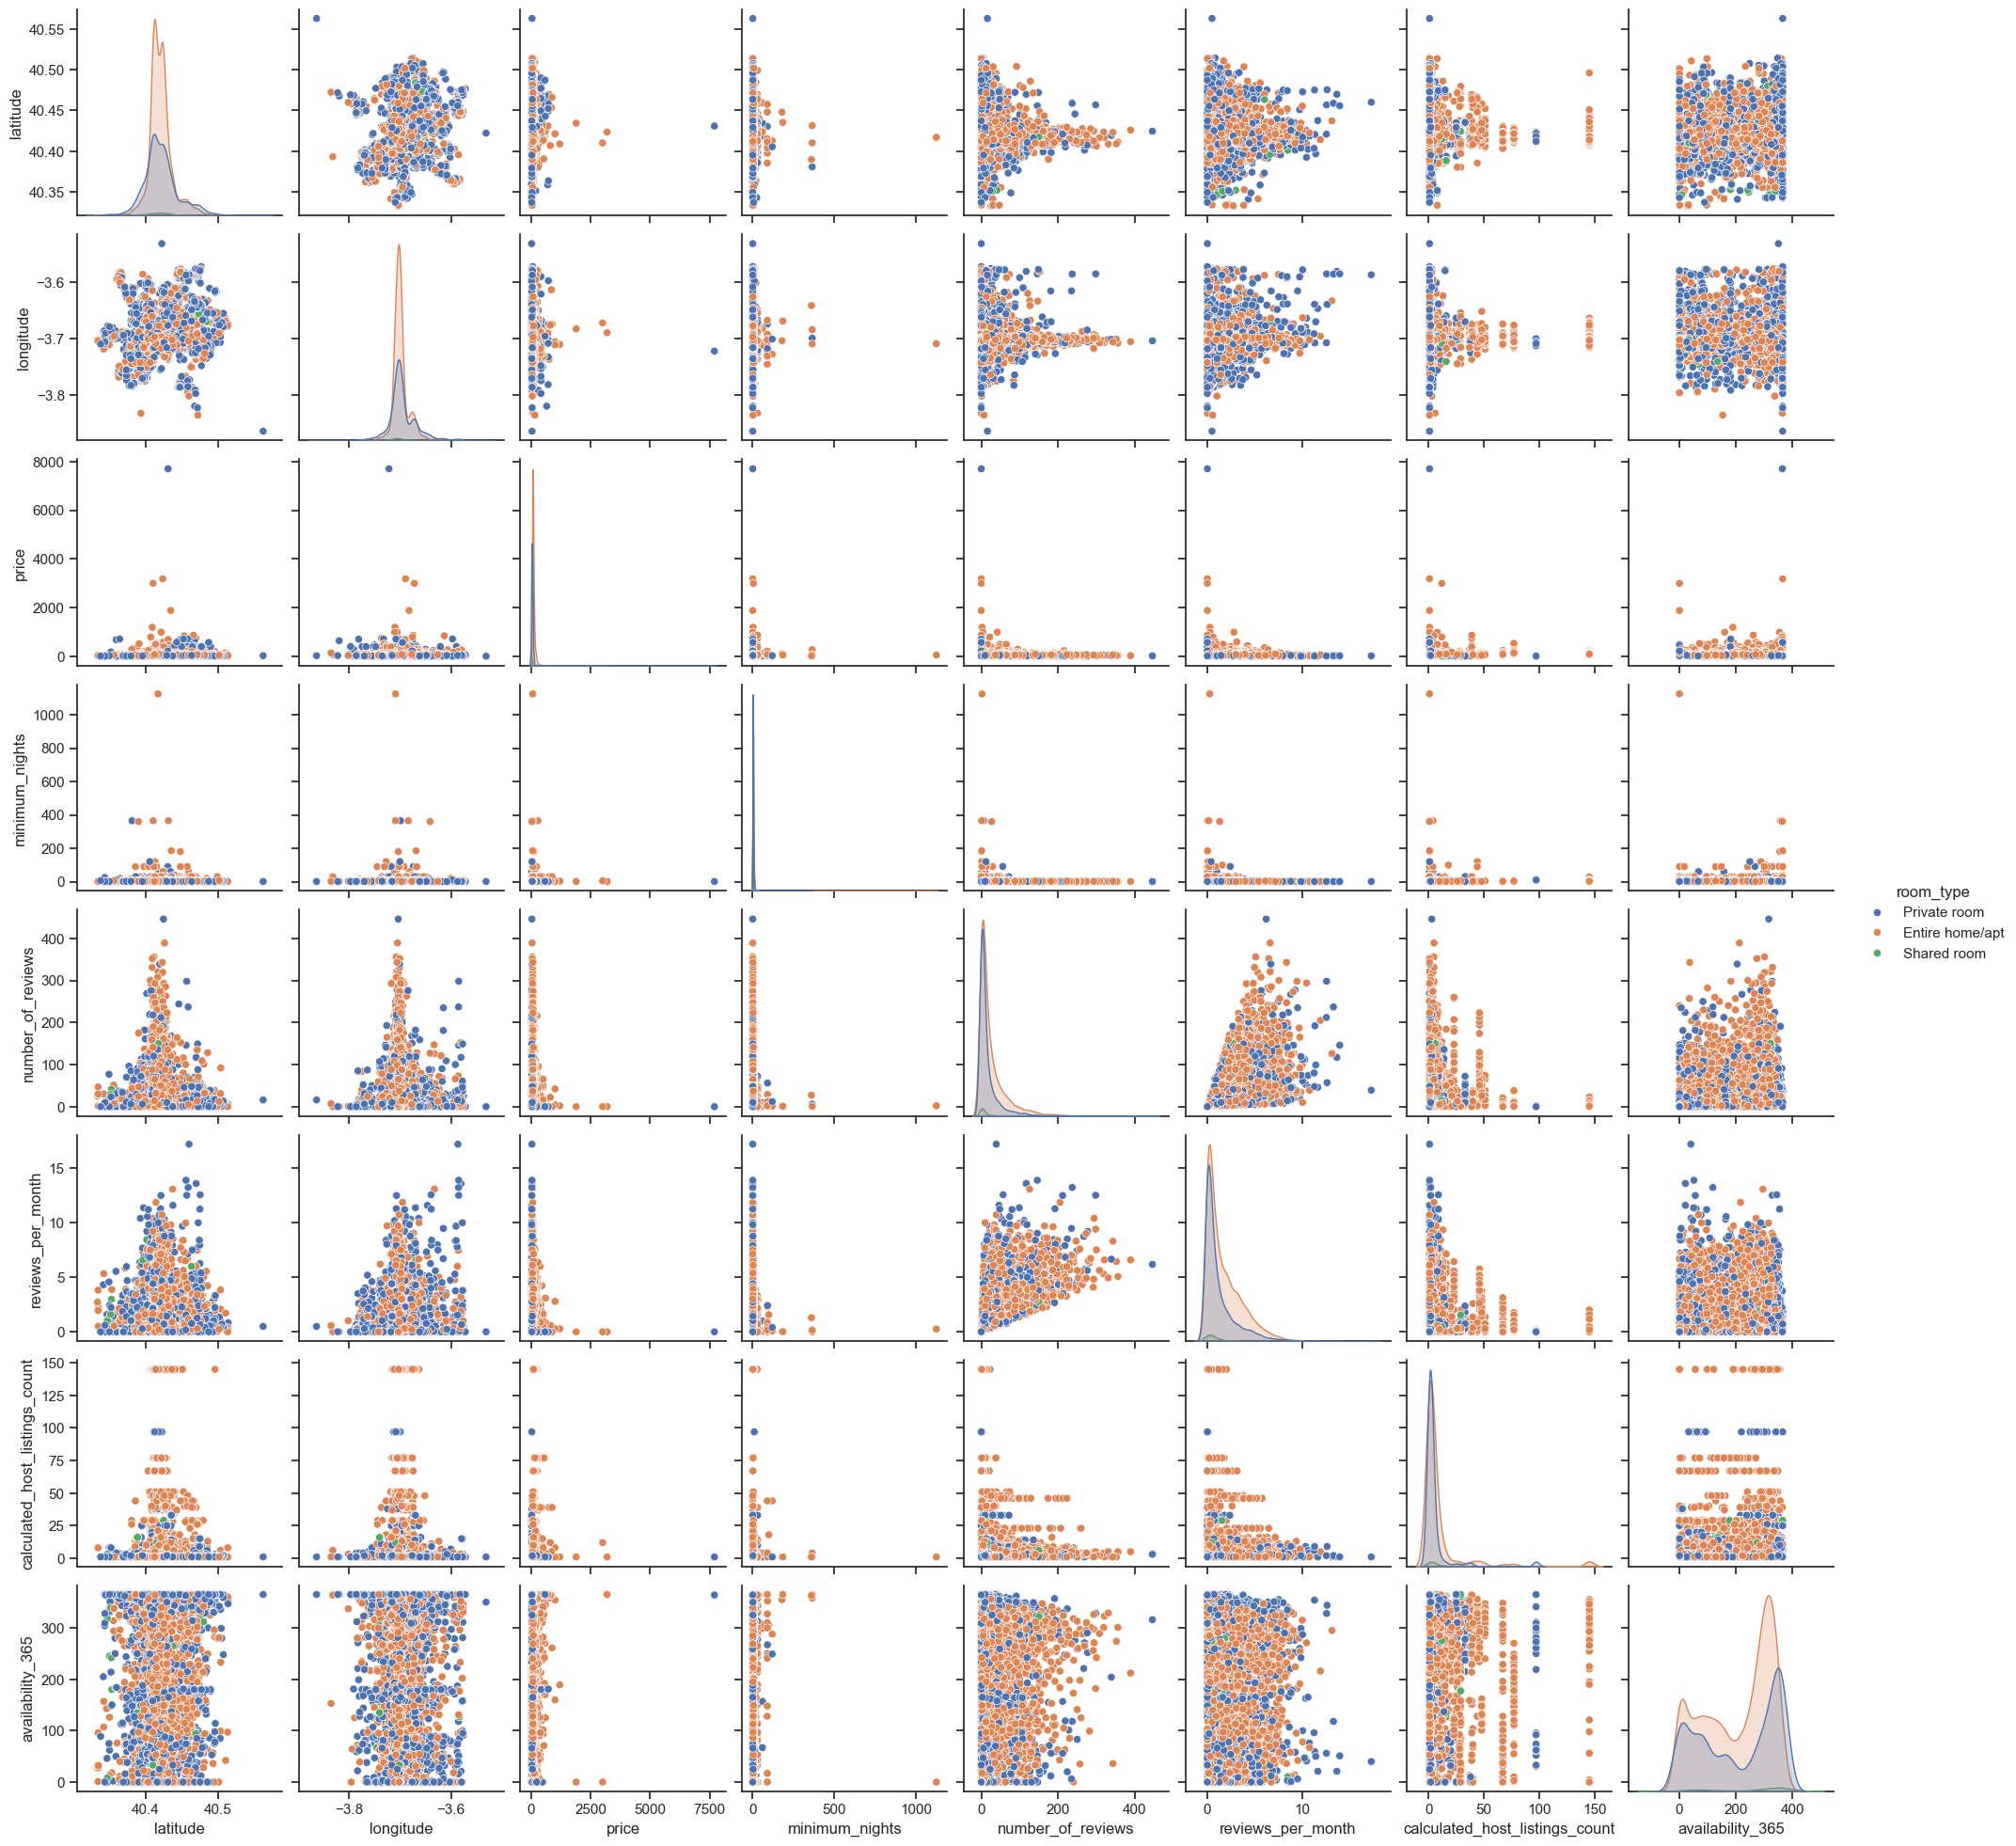

In [11]:
sns.pairplot(train_set, hue="room_type")

## 1.3. Preparación de los datos


Lo primero de todo es generar copias de los datos de entrenamiento sobre los que se trabajará:

In [12]:
# Estos son Pandas DF
X_train = train_set.drop("room_type", axis=1)
y_train = train_set["room_type"].copy()

Se separan los datos categóricos de los numéricos:

In [13]:
# Estos son Pandas DF
X_train_cat = X_train[["neighbourhood_group", "neighbourhood"]]
X_train_num = X_train.select_dtypes(include=[np.number])

### 1.3.1. Limpieza de datos

Histogramas de todas las variables numéricas con los datos de entrenamiento:

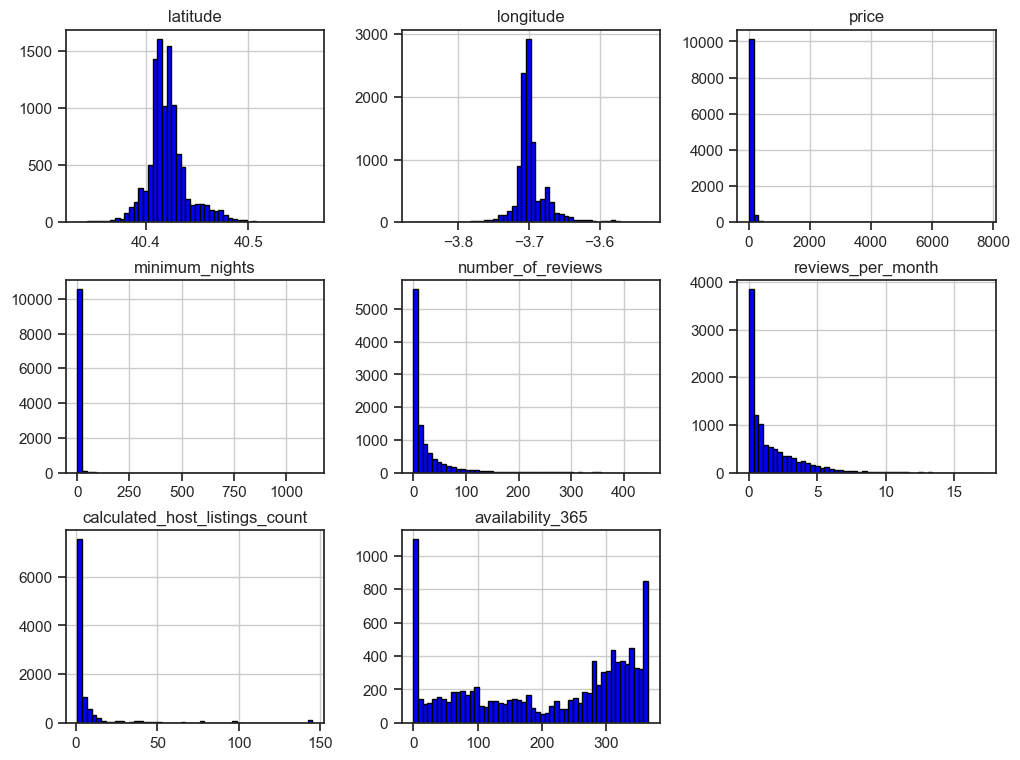

In [14]:
X_train_num.hist(figsize=(12, 9), color='blue', bins=50, edgecolor='black');

Puesto que no faltan datos, la única tarea de limpieza necesaria es eliminar datos atípicos. Se hace uso de la interactividad que ofrecen los histogramas de la librería *Plotly*. Con ésta se investigan una vez más las variables numéricas que presentaban distribuciones asimétricas con grandes colas positivas.

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a pandas DataFrame from the data
df = X_train_num[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]]


# Create the subplots figure
fig = make_subplots(
    rows=5, cols=1,
    subplot_titles=tuple(df.columns))

# Add histograms to the subplots
for i, col in enumerate(df.columns):
    row = i + 1  # Rows start from 1 in Plotly
    trace = go.Histogram(x=df[col], name=col)
    fig.append_trace(trace, row=row, col=1)

# Update the layout and show the figure
fig.update_layout(height=800, width=1200,
                  title_text="Variables Numéricas")
fig.show()

Se observan diferentes problemas con diferentes nivel de importancia. A continuacón se discuten los **posibles** valores atípicos de cada variable:

1. La variable precio tiene 8 anuncios con un precio de más de 1000 (unidades monetarias, por ejemplo $). Mientras que la mayoría de los alojamientos cuestan menos de 1000. Sin embargo, esto no se consideran valores especialmente atípicos, ya que existen diversos alojamientos reales por esos precios.
2. En cuanto al número mínimo de noches, hay diversos anuncios con un requsito de más de 30 noches. Estos son valores poco creíbles. Especialmente los 3 alojamientos con un requisito de 360-365 días.
3. El número de reseñas y la cantidad de reseñas mensuales tienen valores más típicos/esperados, cientos y decenas respectivamente. Aunque sigue habiendo anuncios atípicos con valores bastante alejados del resto de anuncios.
4. El número calculado de anuncios por anfitrión también presenta valores difícilmente creíbles, con cientos de anuncios pertenecientes al mismo anfitrión. Incluso valores de más de 20 para esta variable se podrían considerar atípicos si se considera dónde se encuentra la mayor parte de la distribución.
5. En el caso de *availability_365* no tiene mucho sentido que haya valores iguales a cero, suponiendo que este atributo significa *disponibilidad del alojamiento al año en número de días*. Pero como se desconoce la decripción de dicha variable, no se tiene información de un(a) expert@, y existen numerosas muestras con un valor de cero (cientos de anuncios), se ha decidido no eliminar dichos valores.

En cuanto a las otras 2 variables numéricas (latitud y longitud), a priori no se observan valores atípicos.

 Para eliminar valores atípicos de las variables numéricas se utiliza la técnica de *Isolation Forest* (Fei Tony Liu, 2008):

In [16]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=semilla_aleatoria)
outlier_pred = isolation_forest.fit_predict(X_train_num)
X_train_noOutliers = X_train.iloc[outlier_pred == 1]
y_train_noOutliers = y_train.iloc[outlier_pred == 1]

print(f"Número de valores atípicos (variables numéricas): {np.count_nonzero(outlier_pred == -1)}")

Número de valores atípicos (variables numéricas): 922


Se vuelven a asignar los datos habiendo eliminado valores atípicos:

In [17]:
# Estos son Pandas DF
X_train_noOutliers_cat = X_train_noOutliers[["neighbourhood_group", "neighbourhood"]]
X_train_noOutliers_num = X_train_noOutliers.select_dtypes(include=[np.number])
X_train_noOutliers_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 11619 to 6062
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        9734 non-null   float64
 1   longitude                       9734 non-null   float64
 2   price                           9734 non-null   int64  
 3   minimum_nights                  9734 non-null   int64  
 4   number_of_reviews               9734 non-null   int64  
 5   reviews_per_month               9734 non-null   float64
 6   calculated_host_listings_count  9734 non-null   int64  
 7   availability_365                9734 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 684.4 KB


Se vuelven a examinar las variables numéricas para ver el efecto de eliminar valores atípicos con *Isolation Forest*

In [18]:
print("Se han eliminado:\n")
for col in ("price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"):
  max_value = X_train_noOutliers_num[col].max()
  print(f"Valores de '{col}' > {max_value}")

Se han eliminado:

Valores de 'price' > 1200
Valores de 'minimum_nights' > 25
Valores de 'number_of_reviews' > 187
Valores de 'reviews_per_month' > 9.81
Valores de 'calculated_host_listings_count' > 77


In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a pandas DataFrame from the data
df = X_train_noOutliers_num[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]]


# Create the subplots figure
fig = make_subplots(
    rows=5, cols=1,
    subplot_titles=tuple(df.columns))

# Add histograms to the subplots
for i, col in enumerate(df.columns):
    row = i + 1  # Rows start from 1 in Plotly
    trace = go.Histogram(x=df[col], name=col)
    fig.append_trace(trace, row=row, col=1)

# Update the layout and show the figure
fig.update_layout(height=800, width=1200,
                  title_text="Variables Numéricas")
fig.show()

Por último se inspeccionan **todas** las variables numéricas, para ver como cambian sus distribuciones tras eliminar los valores atípicos.

El mayor efecto se puede apreciar en la reducción de las escalas en los ejes de coordenadas (x).

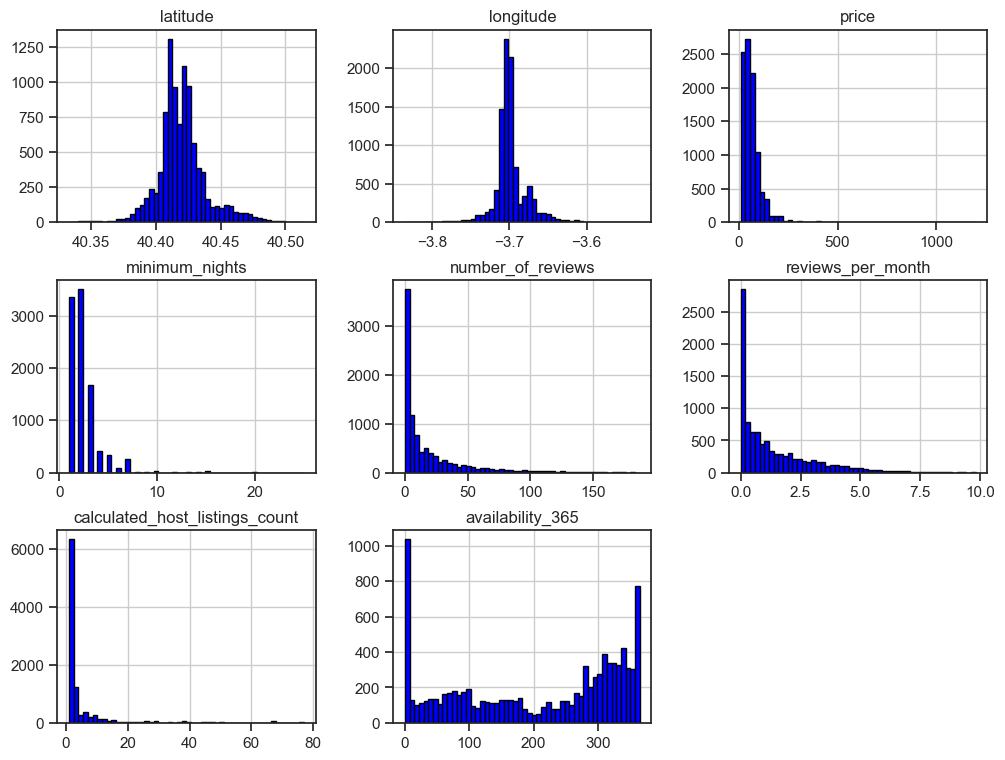

In [20]:
X_train_noOutliers_num.hist(figsize=(12, 9), color='blue', bins=50, edgecolor='black');

### 1.3.2. Transformar datos categóricos

Se convierten los atributos categóricos en codificaciones *one_hot*

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
X_train_noOutliers_cat_1hot = cat_encoder.fit_transform(X_train_noOutliers_cat) # Devuelve ndarray

### 1.3.3. Transformar datos numéricos

Se transforman las variables que tienen **distribuciones asimétricas**, es decir, todas menos la latitud y la longitud. Se usan los siguientes métodos:

* *price*
  * valores: >= 1
  * Transformación: **Logaritmo**
* *minimum_nights*
  * valores: >= 1
  * Transformación: Potencia (Power Transformer)
* *number_of_reviews*
  * valores: >= 0
  * Transformación: Potencia (Power Transformer)
* *reviews_per_month*
  * valores: >= 0
  * Transformación: Potencia (Power Transformer)
* *calculated_host_listings_count*
  * valores: >= 1
  * Transformación: Potencia (Power Transformer)
* *availability_365*
  * valores: >= 0
  * Transformación: Potencia (Power Transformer)

Las variables *number_of_reviews*, *reviews_per_month*, y *availability_365* contienen valores iguales a cero. Por lo que la transformación logarítmica no se puede aplicar. Se han aplicado transformaciones de potencia ya que la transformación de cuantiles genera artefactos artificailes de saturación.


Para las variables *minimum_nights* y *calculated_host_listings_count* (que tenían valores >= 1), se podría haber aplicado una transformación logarítmica. Sin embargo, se ha elegido usar la transformación de potencia (*Power Transform*) ya que ésta es capaz de reducir la variabilidad de los datos en mayor medida que la transformación logarítmica.

En el caso de la variable *price*, la transformación logarítmica es capaz de transformar los datos a una distribución normal.

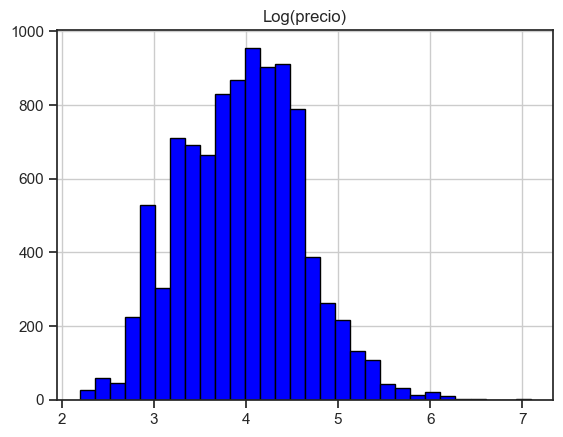

In [22]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
X_train_noOutliers_num_logPrice = log_transformer.transform(X_train_noOutliers_num["price"])
X_train_noOutliers_num_logPrice.hist(color='blue', bins=30, edgecolor='black')
plt.title("Log(precio)");

In [23]:
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
X_train_noOutliers_num_pwrTrans = power_transformer.fit_transform(X_train_noOutliers_num.drop(["price", "latitude", "longitude"], axis=1))

### 1.3.4. Escalar datos numéricos

Se estandarizan todas las variables numéricas dadas sus diferentes escalas. Esto se convierte en un paso de gran importancia para algoritmos que usan distancias, como el *KNN*.

In [24]:
from sklearn.preprocessing import StandardScaler

conjunto_datos = np.hstack((X_train_noOutliers_num[["latitude", "longitude"]].to_numpy(), X_train_noOutliers_num_logPrice.to_numpy().reshape(-1, 1), X_train_noOutliers_num_pwrTrans))

std_scaler = StandardScaler()
X_train_noOutliers_num_scaled = std_scaler.fit_transform(conjunto_datos)

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a pandas DataFrame from the data

df = X_train_noOutliers_num_scaled
[_, features] = df.shape
nombresVariables = list(X_train_noOutliers_num.columns)

# Create the subplots figure
fig = make_subplots(
    rows=8, cols=1,
    shared_xaxes=True
    )

# Add histograms to the subplots
for i in range(features):
  if i in [0, 1]:
    featureName = nombresVariables[i]
  elif i == 2:
    featureName = "Log(price)"
  else:
    featureName = f"PwrTrans({nombresVariables[i]})"

  row = i + 1  # Rows start from 1 in Plotly
  trace = go.Histogram(x=df[:,i], name=featureName)
  fig.append_trace(trace, row=row, col=1)

# Update the layout and show the figure
fig.update_layout(height=800, width=1200,
                  title_text="Variables Numéricas Escaladas")

fig.update_xaxes(showticklabels=True)
fig.show()

Se agrupan todos los pasos en un fragmento de código:

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# Pipeline para variables categóricas
pipeline_cat = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'))

# Pipeline para Latitud y Longitud
pipeline_num_geo = make_pipeline(StandardScaler())

# Pipeline para precio
pipeline_num_log = make_pipeline(FunctionTransformer(np.log, inverse_func=np.exp), StandardScaler())

# Pipeline para el resto de variables numéricas
pipeline_num_resto = make_pipeline(PowerTransformer(method='yeo-johnson', standardize=False), StandardScaler())

# Aplicando transformaciones al conjunto de datos de entrenamiento
preprocesado = ColumnTransformer([
    ("categoricas", pipeline_cat, ["neighbourhood_group", "neighbourhood"]),
    ("geograficas", pipeline_num_geo, ["latitude", "longitude"]),
    ("precio", pipeline_num_log, ["price"]),
    ("resto", pipeline_num_resto, ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]),
])


## 1.4. Selección de modelos (Entrenamiento)

In [27]:
# Linear SVC
from sklearn.svm import LinearSVC

clasificador_LinearSVC = make_pipeline(preprocesado, LinearSVC(random_state=semilla_aleatoria, max_iter=10000))
clasificador_LinearSVC.fit(X_train_noOutliers, y_train_noOutliers)

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categoricas',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['neighbourhood_group',
                                                   'neighbourhood']),
                                                 ('geograficas',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude']),
                                                 ('precio',
                                                  Pipeline(steps=[('functio...
                                                                                       inverse_func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['price']),
                                                 ('resto',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365'])])),
                ('linearsvc', LinearSVC(max_iter=10000, random_state=96))])

In [28]:
# SVC
from sklearn.svm import SVC

clasificador_SVC = make_pipeline(preprocesado, SVC(random_state=semilla_aleatoria, kernel='rbf'))
clasificador_SVC.fit(X_train_noOutliers, y_train_noOutliers)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categoricas',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['neighbourhood_group',
                                                   'neighbourhood']),
                                                 ('geograficas',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude']),
                                                 ('precio',
                                                  Pipeline(steps=[('functio...
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['price']),
                                                 ('resto',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365'])])),
                ('svc', SVC(random_state=96))])

## 1.5. Evaluación de los modelos
A continuación se presentan los valores de las exactitudes de los 10 modelos entrenados por cada clasificador usando validación cruzada

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y_train_pred_LinearSVC = cross_val_predict(clasificador_LinearSVC, X_train_noOutliers, y_train_noOutliers, cv=10);
cv_scores_LinearSVC = cross_val_score(clasificador_LinearSVC, X_train_noOutliers, y_train_noOutliers, cv=10, scoring='accuracy');
cv_scores_LinearSVC

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/Use

array([0.87268994, 0.88911704, 0.86036961, 0.88706366, 0.88489209,
       0.88797533, 0.88283659, 0.8663926 , 0.89722508, 0.87667009])

In [30]:
y_train_pred_SVC = cross_val_predict(clasificador_SVC, X_train_noOutliers, y_train_noOutliers, cv=10)
cv_scores_SVC = cross_val_score(clasificador_SVC, X_train_noOutliers, y_train_noOutliers, cv=10, scoring='accuracy')
cv_scores_SVC

array([0.89117043, 0.90657084, 0.90349076, 0.8973306 , 0.89414183,
       0.89414183, 0.89619733, 0.89414183, 0.91366906, 0.91161357])

Matrices de Confusión

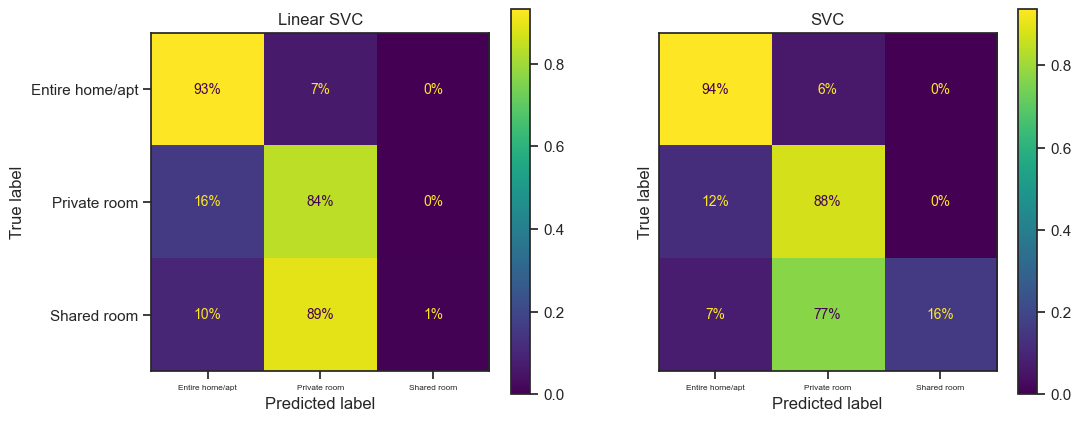

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

fuente = 10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.rc('font', size=fuente)
ConfusionMatrixDisplay.from_predictions(y_train_noOutliers, y_train_pred_LinearSVC, ax=axs[0], normalize="true", values_format=".0%")
axs[0].set_title("Linear SVC")
axs[0].tick_params(axis='x', labelsize=6)

plt.rc('font', size=fuente)
ConfusionMatrixDisplay.from_predictions(y_train_noOutliers, y_train_pred_SVC, ax=axs[1], normalize="true", values_format=".0%")
axs[1].set_title("SVC")
axs[1].set_yticks([])
axs[1].tick_params(axis='x', labelsize=6)

plt.show()

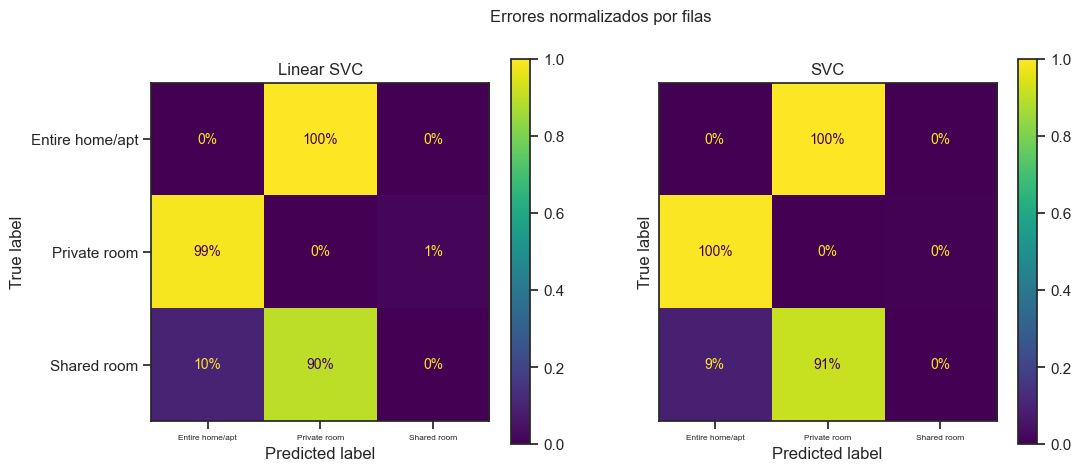

In [32]:
ponderaciones_LinearSVC = (y_train_pred_LinearSVC != y_train_noOutliers)
ponderaciones_SVC = (y_train_pred_SVC != y_train_noOutliers)

fuente = 10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.rc('font', size=fuente)
ConfusionMatrixDisplay.from_predictions(y_train_noOutliers, y_train_pred_LinearSVC, sample_weight = ponderaciones_LinearSVC, ax=axs[0], normalize="true", values_format=".0%")
axs[0].set_title("Linear SVC")
axs[0].tick_params(axis='x', labelsize=6)

plt.rc('font', size=fuente)
ConfusionMatrixDisplay.from_predictions(y_train_noOutliers, y_train_pred_SVC, sample_weight = ponderaciones_SVC, ax=axs[1], normalize="true", values_format=".0%")
axs[1].set_title("SVC")
axs[1].set_yticks([])
axs[1].tick_params(axis='x', labelsize=6)

fig.suptitle("Errores normalizados por filas")
plt.show()

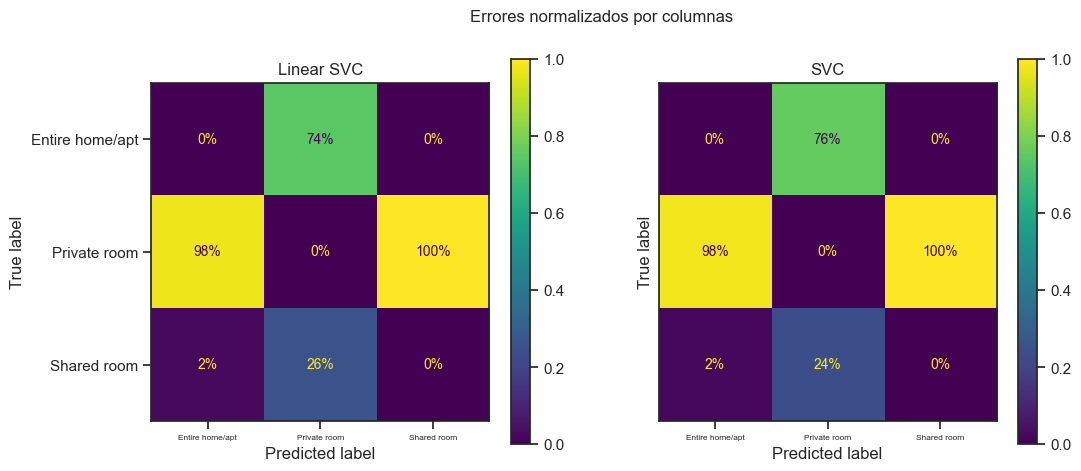

In [33]:
ponderaciones_LinearSVC = (y_train_pred_LinearSVC != y_train_noOutliers)
ponderaciones_SVC = (y_train_pred_SVC != y_train_noOutliers)

fuente = 10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.rc('font', size=fuente)
ConfusionMatrixDisplay.from_predictions(y_train_noOutliers, y_train_pred_LinearSVC, sample_weight = ponderaciones_LinearSVC, ax=axs[0], normalize="pred", values_format=".0%")
axs[0].set_title("Linear SVC")
axs[0].tick_params(axis='x', labelsize=6)

plt.rc('font', size=fuente)
ConfusionMatrixDisplay.from_predictions(y_train_noOutliers, y_train_pred_SVC, sample_weight = ponderaciones_SVC, ax=axs[1], normalize="pred", values_format=".0%")
axs[1].set_title("SVC")
axs[1].set_yticks([])
axs[1].tick_params(axis='x', labelsize=6)

fig.suptitle("Errores normalizados por columnas")
plt.show()

## 1.6. Optimización del modelo

Se realiza una afinación de los hiperparámetros $\gamma$ y $C$ para encontrar el modelo SVC con el mejor rendimiento, usando *accuracy* como métrica de calificación.

Se realizan 2 búsquedas. Una primera 

Se ajustan los 2 hiperparámetros del modelo SVC para mejorar su rendimiento

🛑 **HIGH COMPUTATION TIME**

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid_SVC = {'svc__C': [0.0001, 0.01, 1, 100, 10000], 'svc__gamma': [0.001, 0.1, 1, 10]}
grid_search_SVC = GridSearchCV(clasificador_SVC, param_grid_SVC, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_SVC.fit(X_train_noOutliers, y_train_noOutliers)

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categoricas',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['neighbourhood_group',
                                                                          'neighbourhood']),
                                                                        ('geograficas',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude']),
                                                                        ('prec...
                                                                         Pipeline(steps=[('powertransformer',
                                                                                          PowerTransformer(standardize=False)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['minimum_nights',
                                                                          'number_of_reviews',
                                                                          'reviews_per_month',
                                                                          'calculated_host_listings_count',
                                                                          'availability_365'])])),
                                       ('svc', SVC(random_state=96))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.0001, 0.01, 1, 100, 10000],
                         'svc__gamma': [0.001, 0.1, 1, 10]},
             scoring='accuracy')

In [35]:
grid_search_SVC_results = pd.DataFrame(grid_search_SVC.cv_results_)
# Best model (First in the ranking)
grid_search_SVC_results[grid_search_SVC_results.rank_test_score == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
9       5.919439       0.18454         0.381397        0.021442            1   

  param_svc__gamma                            params  split0_test_score  \
9              0.1  {'svc__C': 1, 'svc__gamma': 0.1}            0.89117   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
9           0.906571           0.903491           0.897331           0.894142   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
9           0.894142           0.896197           0.894142           0.913669   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
9           0.911614         0.900247        0.007609                1

Se representa un gráfico de curvas de nivel, dónde los las variables son los hiperparámetros del modelo. Dado el alto coste computacional, solo se dispone de 20 puntos (5x4), ya que se han entrenado 20 modelos.

Text(0.5, 1.0, 'Accuracy of SVC model hyperparameters')

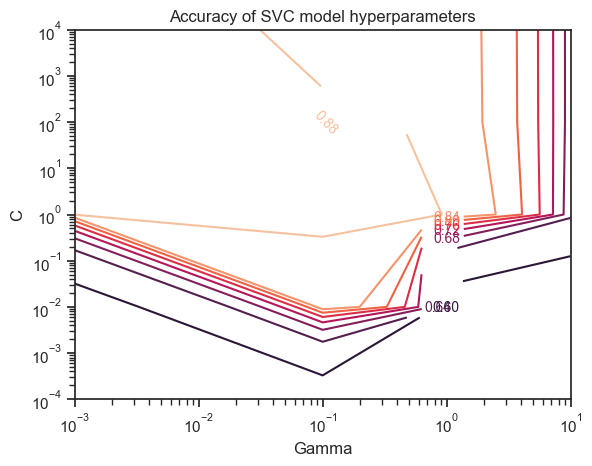

In [36]:
X = np.array([0.001, 0.1, 1, 10]) # Gamma
Y = np.array([0.0001, 0.01, 1, 100, 10000]) # C
Z = np.array(grid_search_SVC_results.mean_test_score).reshape(5,4)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
# Set logarithmic scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Accuracy of SVC model hyperparameters')

Aún así, se puede apreciar que los siguientes intervalos proporcionan los mejores resultados de exactitud:
- $C \in [1, 10000]$
- $\gamma \in [0.001, 0.1]$

Estos siguen siendo intervalos bastante amplios, por lo que se eligen dominios más pequeños, es decir, donde ambos valores frontera tienen un order de magnitud similar.

Se realiza otra búsqueda de red en los intervalos:
- $C \in [1, 10]$
- $\gamma \in [0.01, 0.1]$

Además, se reduce el número de validaciones cruzadas para agilizar el tiempo de computación.

🛑 **HIGH COMPUTATION TIME**

In [37]:
param_grid_SVC_2 = {'svc__C': [1, 2.5, 5, 7.5, 10], 'svc__gamma': [0.01, 0.035, 0.075, 0.1]}
grid_search_SVC_2 = GridSearchCV(clasificador_SVC, param_grid_SVC_2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_SVC_2.fit(X_train_noOutliers, y_train_noOutliers)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categoricas',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['neighbourhood_group',
                                                                          'neighbourhood']),
                                                                        ('geograficas',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude']),
                                                                        ('preci...
                                                                         Pipeline(steps=[('powertransformer',
                                                                                          PowerTransformer(standardize=False)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['minimum_nights',
                                                                          'number_of_reviews',
                                                                          'reviews_per_month',
                                                                          'calculated_host_listings_count',
                                                                          'availability_365'])])),
                                       ('svc', SVC(random_state=96))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2.5, 5, 7.5, 10],
                         'svc__gamma': [0.01, 0.035, 0.075, 0.1]},
             scoring='accuracy')

Por último, visualizamos los resultados de ésta última búsqueda de red con validación cruzada, en un intervalo más pequeño y refinado. Se mantiene la escala lineal de los ejes.

Text(0.5, 1.0, 'Accuracy of SVC model hyperparameters')

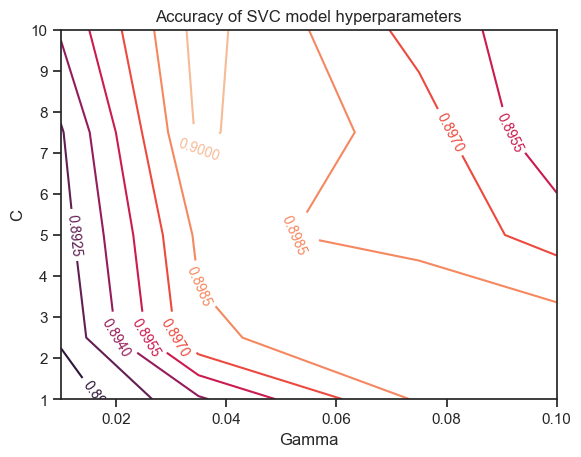

In [38]:
grid_search_SVC_2_results = pd.DataFrame(grid_search_SVC_2.cv_results_)
X = np.array([0.01, 0.035, 0.075, 0.1]) # Gamma
Y = np.array([1, 2.5, 5, 7.5, 10]) # C
Z = np.array(grid_search_SVC_2_results.mean_test_score).reshape(5,4)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_title('Accuracy of SVC model hyperparameters')

Finalmente se elige el modelo con los hiperparámetros que resultan en el mejor rendimiento en el conjunto de entrenamiento.

In [39]:
# Best model (First in the ranking)
grid_search_SVC_2_results[grid_search_SVC_2_results.rank_test_score == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
17       3.996045      0.107658         0.587149        0.008738           10   

   param_svc__gamma                               params  split0_test_score  \
17            0.035  {'svc__C': 10, 'svc__gamma': 0.035}           0.903441   

    split1_test_score  split2_test_score  split3_test_score  \
17           0.901387           0.892142           0.898819   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
17           0.906989         0.900555        0.004984                1

In [40]:
mejor_clasificador_SVC = make_pipeline(preprocesado, SVC(C=10, gamma=0.035, kernel='rbf', random_state=semilla_aleatoria))
mejor_clasificador_SVC.fit(X_train_noOutliers, y_train_noOutliers)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categoricas',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['neighbourhood_group',
                                                   'neighbourhood']),
                                                 ('geograficas',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude']),
                                                 ('precio',
                                                  Pipeline(steps=[('functio...
                                                                                       inverse_func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['price']),
                                                 ('resto',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365'])])),
                ('svc', SVC(C=10, gamma=0.035, random_state=96))])

## 1.7. Evaluación en el conjunto de prueba

In [41]:
X_test = test_set.drop("room_type", axis=1)
y_test = test_set["room_type"].copy()

y_test_pred_mejor_SVC = mejor_clasificador_SVC.predict(X_test)

La exactitud del modelo en el conjunto de validación es bastante alta:

In [42]:
sklearn.metrics.accuracy_score(y_test, y_test_pred_mejor_SVC)

0.9020637898686679

Sin embargo, la matriz de confusión revela que el modelo sigue teniendo problemas para identificar correctamente habitaciones de tipo *shared room*.

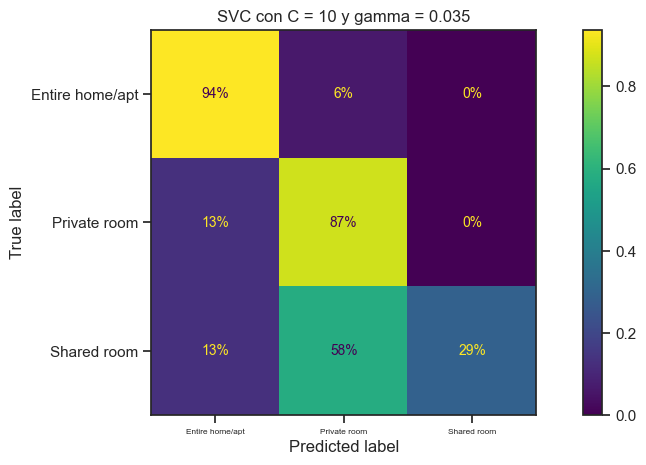

In [43]:
fuente = 10
fig, axs = plt.subplots(figsize=(12, 5))

plt.rc('font', size=fuente)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_mejor_SVC, ax=axs, normalize="true", values_format=".0%")
axs.set_title("SVC con C = 10 y gamma = 0.035")
axs.tick_params(axis='x', labelsize=6)

plt.show()

Esto muestra la necesidad de examinar el rendimiento del modelo exhaustivamente de acuerdo a los requisitos del proyecto. En este caso, si solo nos fijásemos en la exactitud, habríamos permanecido ciegos al verdadero rendimiento del modelo.

# Parte 2: Regresión
Modelar el **precio** en función del resto de variables.

In [44]:
import plotly.express as px
fig = px.histogram(datos["price"], x="price")
fig.show()

## 2.1. Conjunto de evaluación
Para crear el conjunto de evaluación, es conveniente respetar los mismos porcentajes de los intervalos de una variable en todos los conjuntos: entrenamiento y validación.

Empezamos por crear 5 intervalos para la variable dependiente a modelar, elegidos de forma arbitraria:
* [0, 50)
* [50, 100)
* [100, 200)
* [200, 300)
* [300, inf)

Estratificamos la variable precio de acuerdo a estas cinco intervalos/categorias:

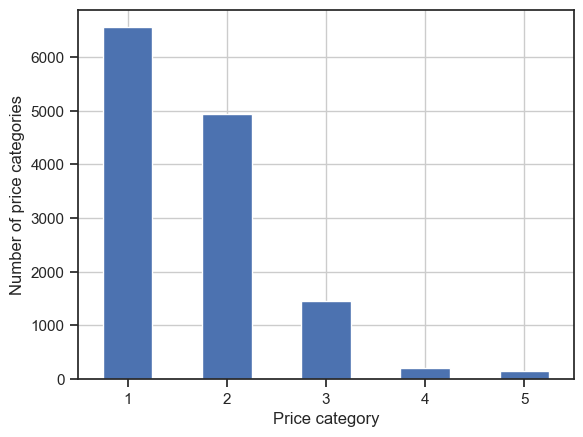

In [45]:
datos["price_intervals"] = pd.cut(datos["price"],
                               bins=[0., 50, 100, 200, 300, np.inf],
                               labels=[1, 2, 3, 4, 5])

datos["price_intervals"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Price category")
plt.ylabel("Number of price categories")
plt.show()

Con la siguiente línea de código conseguimos dividir los datos en 2 conjuntos de entrenamiento y evaluación que respetan los porcentajes de las diferentes categorías de precios creadas:

In [46]:
from sklearn.model_selection import train_test_split

train_set_reg, test_set_reg = train_test_split(datos, test_size=0.2, stratify=datos["price_intervals"], random_state=semilla_aleatoria)

In [47]:
def room_type_proportions(data):
    return data["price_intervals"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall %": room_type_proportions(datos),
    "Stratified Train %": room_type_proportions(train_set_reg),
    "Stratified Test %": room_type_proportions(test_set_reg),
}).sort_index()

compare_props.index.name = "Price interval"

(compare_props * 100).round(2)

Overall %  Stratified Train %  Stratified Test %
Price interval                                                  
1                   49.21               49.21              49.19
2                   37.06               37.06              37.07
3                   10.98               10.98              10.99
4                    1.54                1.54               1.54
5                    1.21                1.21               1.20

## 2.2. Exploración de los datos
Ver sección 1.3

## 2.3. Preparación de los datos
Primero se generan copias de los datos de entrenamiento sobre los que se treabajarán, y se separan datos numéricos de categóricos:

In [48]:
# Estos son Pandas DF
X_test = test_set_reg.drop("price", axis=1)
y_test = test_set_reg["price"].copy()
X_train = train_set_reg.drop("price", axis=1)
y_train = train_set_reg["price"].copy()

# Estos son Pandas DF
X_train_cat = X_train[["room_type", "neighbourhood_group", "neighbourhood"]]
X_train_num = X_train.select_dtypes(include=[np.number])

### 2.3.1. Limpieza de datos
Como ya se ha descrito para el problema de clasificación (sección 1.4.1), existen posibles datos atípicos. Nos centramos en las variables:
* price
* minimun_nights
* calculated_host_listings_count

Generando las funciones de densidad de probabilidad de éstas 3 variables mediante *kde*, observamos que se concentran en torno a ciertos valores, y presentan unas colas muy alargadas hacia valores positivos relativamente altos.

Text(0.5, 1.0, 'KDE Original')

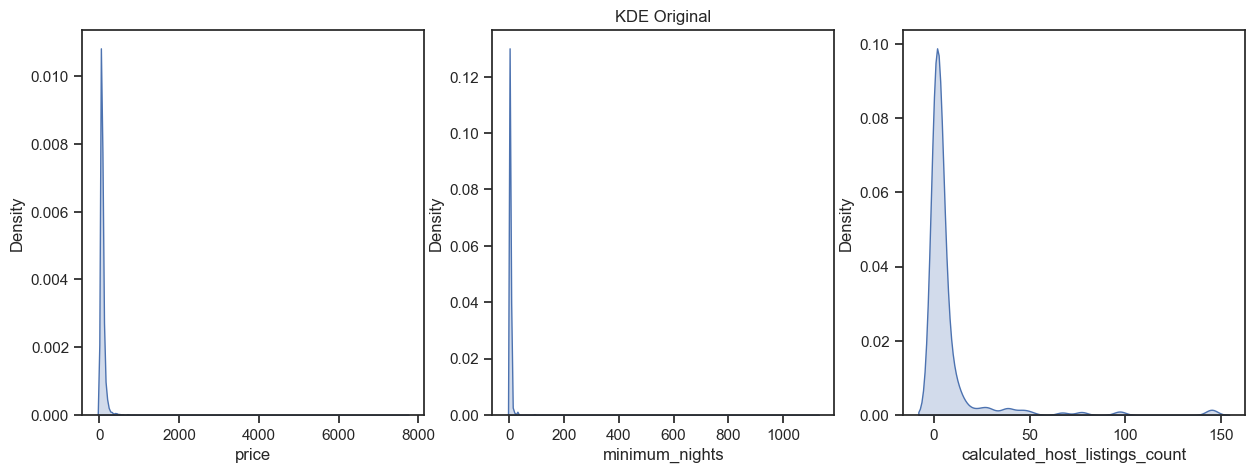

In [49]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.kdeplot(data=y_train, ax=axes[0], fill=True)
sns.kdeplot(data=X_train["minimum_nights"], ax=axes[1], fill=True)
sns.kdeplot(data=X_train["calculated_host_listings_count"], ax=axes[2], fill=True)
axes[1].set_title('KDE Original')

En la PEC I se eligió un *IsolationForest* como método para encontrar valores atípicos. 
```python
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=semilla_aleatoria)
outlier_pred = isolation_forest.fit_predict(X_train_num)
X_train_noOutliers = X_train.iloc[outlier_pred == 1]
y_train_noOutliers = y_train.iloc[outlier_pred == 1]

print(f"Número de valores atípicos (variables numéricas): {np.count_nonzero(outlier_pred == -1)}")
```

Para ésta prácitca, se supone que se tiene la opinión de un(a) expert@. Se elige 6 veces la desviación típica como valores frontera para la categorización como valores atípicos. Aunque siendo una elección arbitraria, ya que se podría haber elegido 3 veces el valor σ, u otra medida: 6σ considera aprox. el 99.9997% de los casos.

Valores por encima de los obtenidos mediante 6σ no se consideran para el entrenamiento del modelo, ya que son especialmente improbables de acuerdo con la opinión de dich@ expert@.

In [50]:
def compute_6_sigma(variable):
  six_sigma = round(6 * np.std(variable),0)
  return (f"\nThe 6-Sigma value of the variable '{variable.name}' is {six_sigma}", six_sigma)

statement1, six_sigma_price = compute_6_sigma(y_train)
statement2, six_sigma_min_nights = compute_6_sigma(X_train["minimum_nights"])
statement3, six_sigma_listings = compute_6_sigma(X_train["calculated_host_listings_count"])

statement1, statement2, statement3

("\nThe 6-Sigma value of the variable 'price' is 668.0",
 "\nThe 6-Sigma value of the variable 'minimum_nights' is 81.0",
 "\nThe 6-Sigma value of the variable 'calculated_host_listings_count' is 117.0")

Puesto que se va a entrenar un modelo de regresión sin considerar los valores atípicos por encima de esas fronteras calculadas (6 $\sigma$), se deben eliminar las muestras que contengan valores por encima de dichas fronteras para cualquiera de esas 3 variables, y de los dos conjuntos (entrenamiento y validación).

In [51]:
# Training
indices_outliers_price = y_train[y_train>six_sigma_price].index
indices_outliers_nights = X_train[X_train["minimum_nights"] > six_sigma_min_nights].index
indices_outliers_listings = X_train[X_train["calculated_host_listings_count"] > six_sigma_listings].index

# Test
indices_outliers_price_test = y_test[y_test>six_sigma_price].index
indices_outliers_nights_test = X_test[X_test["minimum_nights"] > six_sigma_min_nights].index
indices_outliers_listings_test = X_test[X_test["calculated_host_listings_count"] > six_sigma_listings].index

In [52]:
#  Append indices of outliers to drop from other variables:

# Training
indices_outliers_all = indices_outliers_price.append(indices_outliers_nights)
indices_outliers_all = indices_outliers_all.append(indices_outliers_listings)

# Test
indices_outliers_all_test = indices_outliers_price_test.append(indices_outliers_nights_test)
indices_outliers_all_test = indices_outliers_all_test.append(indices_outliers_listings_test)

Estos son los datos sin valores atípicos:

In [53]:
# Training
X_train_noOutliers = X_train.drop(indices_outliers_all)
y_train_noOutliers = y_train.drop(indices_outliers_all)

X_train_cat_noOutliers = X_train_cat.drop(indices_outliers_all)
X_train_num_noOutliers = X_train_num.drop(indices_outliers_all)

# Test
X_test_noOutliers = X_test.drop(indices_outliers_all_test)
y_test_noOutliers = y_test.drop(indices_outliers_all_test)

Por último, observamos las distribuciones *kde* para las 3 variables

Text(0.5, 1.0, 'KDE Truncada')

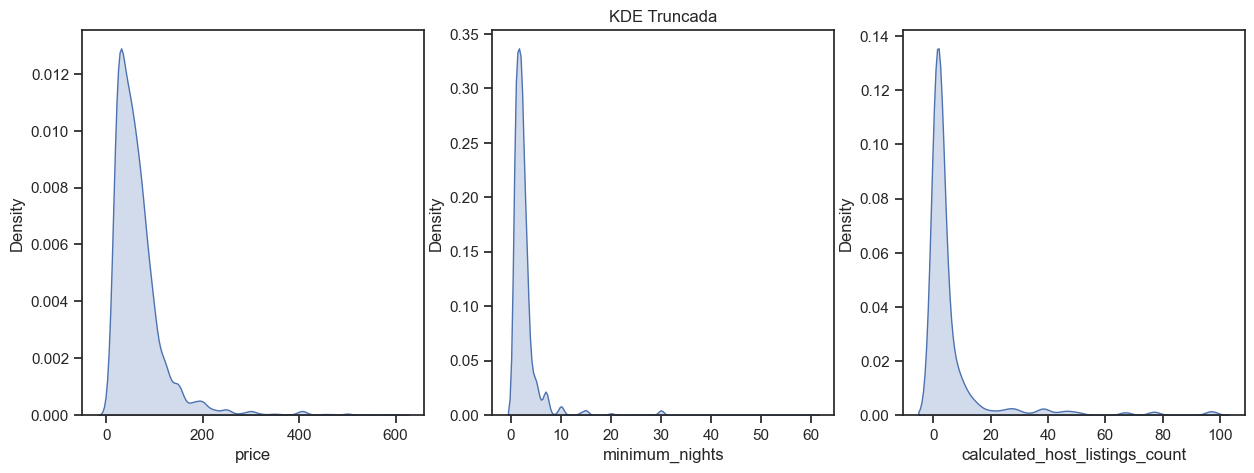

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.kdeplot(data=y_train_noOutliers, ax=axes[0], fill=True)
sns.kdeplot(data=X_train_noOutliers["minimum_nights"], ax=axes[1], fill=True)
sns.kdeplot(data=X_train_noOutliers["calculated_host_listings_count"], ax=axes[2], fill=True)
axes[1].set_title('KDE Truncada')

### 2.3.2 Pipeline Preprocesado
La transformación y escalado de los datos sigue exactamente el mismo fundamento usado en el problema de clasificación.

Se generan dos *pipelines* que serán comparados, uno considerando los barrios (*neighbourhood*), y otro sin.

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

# Pipeline para variables categóricas
pipeline_cat = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'))

# Pipeline para Latitud y Longitud
pipeline_num_geo = make_pipeline(StandardScaler())

# Pipeline para el resto de variables numéricas
pipeline_num_resto = make_pipeline(PowerTransformer(method='yeo-johnson', standardize=False), StandardScaler())

# Aplicando transformaciones al conjunto de datos de entrenamiento
preprocesado = ColumnTransformer([
    ("categoricas", pipeline_cat, ["room_type", "neighbourhood_group", "neighbourhood"]),
    ("geograficas", pipeline_num_geo, ["latitude", "longitude"]),
    ("resto", pipeline_num_resto, ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]),
])

preprocesado_sin_barrios = ColumnTransformer([
    ("categoricas", pipeline_cat, ["room_type", "neighbourhood_group"]),
    ("geograficas", pipeline_num_geo, ["latitude", "longitude"]),
    ("resto", pipeline_num_resto, ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]),
])

## 2.4. Entrenamiento: LinearSVR y SVR

### 2.4.1. LinearSVR


In [56]:
from sklearn.svm import LinearSVR

regresion_LinearSVR = make_pipeline(preprocesado, LinearSVR(random_state=semilla_aleatoria))
regresion_LinearSVR.fit(X_train_noOutliers, y_train_noOutliers)

regresion_LinearSVR_sin_barrios= make_pipeline(preprocesado_sin_barrios, LinearSVR(random_state=semilla_aleatoria))
regresion_LinearSVR_sin_barrios.fit(X_train_noOutliers, y_train_noOutliers)

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categoricas',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['room_type',
                                                   'neighbourhood_group']),
                                                 ('geograficas',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude']),
                                                 ('resto',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365'])])),
                ('linearsvr', LinearSVR(random_state=96))])

### 2.4.2. SVR

In [57]:
from sklearn.svm import SVR

regresion_SVR = make_pipeline(preprocesado, SVR())
regresion_SVR.fit(X_train, y_train)

regresion_SVR_sin_barrios = make_pipeline(preprocesado_sin_barrios, SVR())
regresion_SVR_sin_barrios.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categoricas',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['room_type',
                                                   'neighbourhood_group']),
                                                 ('geograficas',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude']),
                                                 ('resto',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365'])])),
                ('svr', SVR())])

## 2.5. Evaluación del modelo (en el conjunto de entrenamiento)

In [58]:
# SIN Barrios

# Predictions
y_pred_LinearSVR_sin_barrios = regresion_LinearSVR_sin_barrios.predict(X_train_noOutliers)
y_pred_SVR_sin_barrios = regresion_SVR_sin_barrios.predict(X_train_noOutliers)

# RMSE
from sklearn.metrics import mean_squared_error
rmse_LinearSVR_sin_barrios = mean_squared_error(y_train_noOutliers, y_pred_LinearSVR_sin_barrios, squared=False)
rmse_SVR_sin_barrios = mean_squared_error(y_train_noOutliers, y_pred_SVR_sin_barrios, squared=False)

rmse_LinearSVR_sin_barrios, rmse_SVR_sin_barrios

(51.60248708019824, 51.092834531113105)

In [59]:
# CON Barrios

# Predictions
y_pred_LinearSVR = regresion_LinearSVR.predict(X_train_noOutliers)
y_pred_SVR = regresion_SVR.predict(X_train_noOutliers)

# RMSE
from sklearn.metrics import mean_squared_error
rmse_LinearSVR = mean_squared_error(y_train_noOutliers, y_pred_LinearSVR, squared=False)
rmse_SVR = mean_squared_error(y_train_noOutliers, y_pred_SVR, squared=False)

rmse_LinearSVR, rmse_SVR

(50.97349423909636, 50.91990162551053)

Es mejor dejar los 126 barrios como *feature* de la regresión.

La diferencia entre los modelos (LinearSVR y SVR) es mínima. La raíz del error cuadrático medio tiene valores similares para ambos modelos, considerando los conjuntos de entrenamiento.

Aproximadamente, ambos modelos cometen un error medio de 51 unidades (euros, dólares, etc).
- RMSE Linear SVR (precio) = 50.97
- RMSE SVR (precio) = 50.92

Dado que la diferencia no es descomunal entre ambos modelos, se elige el LinearSVR, ya que así se afronta una búsqueda de red diferente al problema de clasificación. Es decir, en vez de relizar una búsqueda en un espacio bidimensional se realiza una optimización en un espacio unidimensional.

## 2.6. Optimización del modelo

Se realiza una afinación del hiperparámetro $C$ para encontrar el modelo con el mejor rendimiento, usando *RMSE* como métrica de calificación.

🛑 **HIGH COMPUTATION TIME**

In [60]:
regresion_LinearSVR = make_pipeline(preprocesado, LinearSVR(max_iter=10000, random_state=semilla_aleatoria))
param_grid_Linear_SVR = {'linearsvr__C': [0.0001, 0.01, 1, 100, 10000]}
grid_search_SVR = GridSearchCV(regresion_LinearSVR, param_grid_Linear_SVR, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_SVR.fit(X_train_noOutliers, y_train_noOutliers)

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dua

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categoricas',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['room_type',
                                                                          'neighbourhood_group',
                                                                          'neighbourhood']),
                                                                        ('geograficas',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitu...
                                                                                          PowerTransformer(standardize=False)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['minimum_nights',
                                                                          'number_of_reviews',
                                                                          'reviews_per_month',
                                                                          'calculated_host_listings_count',
                                                                          'availability_365'])])),
                                       ('linearsvr',
                                        LinearSVR(max_iter=10000,
                                                  random_state=96))]),
             n_jobs=-1,
             param_grid={'linearsvr__C': [0.0001, 0.01, 1, 100, 10000]},
             scoring='neg_root_mean_squared_error')

In [61]:
pd.DataFrame(grid_search_SVR.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.036692      0.006608         0.002956        0.001096   
1       0.048958      0.012791         0.004009        0.001816   
2       0.057534      0.009052         0.004515        0.002708   
3       0.349755      0.020666         0.005066        0.002137   
4       3.350113      0.209562         0.002617        0.000256   

  param_linearsvr__C                    params  split0_test_score  \
0             0.0001  {'linearsvr__C': 0.0001}         -79.946124   
1               0.01    {'linearsvr__C': 0.01}         -47.661614   
2                  1       {'linearsvr__C': 1}         -42.817180   
3                100     {'linearsvr__C': 100}         -42.683758   
4              10000   {'linearsvr__C': 10000}         -43.410568   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0         -90.275503         -86.194578         -83.778535         -88.409032   
1         -60.802021         -54.032173         -55.510335         -60.098520   
2         -55.959787         -49.014170         -51.345364         -55.338229   
3         -55.164148         -48.442625         -51.065280         -55.073146   
4         -55.491511         -50.946401         -51.158565         -54.689985   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0         -84.194810         -85.749853         -84.490968         -75.746834   
1         -55.131753         -54.721322         -53.522580         -43.919325   
2         -50.961933         -49.747805         -48.503120         -39.008770   
3         -51.112473         -49.748656         -48.341859         -38.871599   
4         -52.056126         -50.168748         -49.552992         -39.947208   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0         -95.872497       -85.465873        5.206195                5  
1         -68.289347       -55.368899        6.442146                4  
2         -63.640797       -50.633716        6.515233                2  
3         -62.803328       -50.330687        6.326263                1  
4         -62.863377       -51.028548        5.985091                3

In [62]:
grid_search_SVR.best_params_

{'linearsvr__C': 100}

La siguiente búsqueda se refina entorno al mejor valor de $C$ encontrado, 100:

🛑 **HIGH COMPUTATION TIME**

In [63]:
param_grid_Linear_SVR_2 = {'linearsvr__C': np.linspace(50, 300, 100)}
grid_search_SVR_2 = GridSearchCV(regresion_LinearSVR, param_grid_Linear_SVR_2, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_SVR_2.fit(X_train_noOutliers, y_train_noOutliers)

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dua

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dua

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categoricas',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['room_type',
                                                                          'neighbourhood_group',
                                                                          'neighbourhood']),
                                                                        ('geograficas',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitu...
       231.81818182, 234.34343434, 236.86868687, 239.39393939,
       241.91919192, 244.44444444, 246.96969697, 249.49494949,
       252.02020202, 254.54545455, 257.07070707, 259.5959596 ,
       262.12121212, 264.64646465, 267.17171717, 269.6969697 ,
       272.22222222, 274.74747475, 277.27272727, 279.7979798 ,
       282.32323232, 284.84848485, 287.37373737, 289.8989899 ,
       292.42424242, 294.94949495, 297.47474747, 300.        ])},
             scoring='neg_root_mean_squared_error')

In [64]:
pd.DataFrame(grid_search_SVR_2.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.214586      0.018219         0.004698        0.003759   
1        0.221242      0.015875         0.003848        0.001612   
2        0.225632      0.014701         0.004013        0.001955   
3        0.237605      0.010725         0.002956        0.000627   
4        0.232238      0.013247         0.004260        0.002493   
..            ...           ...              ...             ...   
95       0.855462      0.057480         0.003353        0.001388   
96       0.869476      0.017409         0.004455        0.002017   
97       0.866336      0.020053         0.002982        0.000756   
98       0.852056      0.047294         0.004868        0.001913   
99       0.779796      0.076250         0.002985        0.001127   

   param_linearsvr__C                                params  \
0                50.0                {'linearsvr__C': 50.0}   
1           52.525253  {'linearsvr__C': 52.525252525252526}   
2           55.050505   {'linearsvr__C': 55.05050505050505}   
3           57.575758   {'linearsvr__C': 57.57575757575758}   
4            60.10101  {'linearsvr__C': 60.101010101010104}   
..                ...                                   ...   
95          289.89899   {'linearsvr__C': 289.8989898989899}   
96         292.424242   {'linearsvr__C': 292.4242424242424}   
97         294.949495   {'linearsvr__C': 294.9494949494949}   
98         297.474747  {'linearsvr__C': 297.47474747474746}   
99              300.0               {'linearsvr__C': 300.0}   

    split0_test_score  split1_test_score  split2_test_score  \
0          -42.702806         -55.485173         -48.565439   
1          -42.665062         -55.462879         -48.611326   
2          -42.704799         -55.431516         -48.599490   
3          -42.684769         -55.430351         -48.546387   
4          -42.678903         -55.401838         -48.573991   
..                ...                ...                ...   
95         -42.716393         -54.807652         -48.512658   
96         -42.677288         -54.882204         -48.471318   
97         -42.736455         -54.830466         -48.501571   
98         -42.721444         -54.814620         -48.512009   
99         -42.688895         -54.859702         -48.509361   

    split3_test_score  split4_test_score  split5_test_score  \
0          -51.065569         -55.064084         -50.988655   
1          -51.052707         -55.032290         -51.007926   
2          -51.058037         -55.024063         -51.047277   
3          -51.051884         -55.078931         -51.084072   
4          -51.069561         -55.070494         -51.087551   
..                ...                ...                ...   
95         -51.098880         -55.041168         -51.698536   
96         -51.054839         -55.048806         -51.711560   
97         -51.059276         -55.023062         -51.751070   
98         -51.035141         -55.074561         -51.758729   
99         -51.066199         -55.077265         -51.783103   

    split6_test_score  split7_test_score  split8_test_score  \
0          -49.738800         -48.374799         -38.896154   
1          -49.697696         -48.361039         -38.871919   
2          -49.755278         -48.363168         -38.859160   
3          -49.756328         -48.348126         -38.865913   
4          -49.741416         -48.379754         -38.873963   
..                ...                ...                ...   
95         -49.731067         -48.409170         -38.900117   
96         -49.743294         -48.338171         -38.900838   
97         -49.726842         -48.342512         -38.903349   
98         -49.712336         -48.338957         -38.877789   
99         -49.735243         -48.347395         -38.911433   

    split9_test_score  mean_test_score  std_test_score  rank_test_score  
0          -63.108667       -50.399015        6.398452              100  
1          

In [65]:
grid_search_SVR_2.best_params_

{'linearsvr__C': 183.83838383838383}

🛑 **HIGH COMPUTATION TIME**

In [66]:
param_grid_Linear_SVR_3 = {'linearsvr__C': np.linspace(180, 186, 50)}
grid_search_SVR_3 = GridSearchCV(regresion_LinearSVR, param_grid_Linear_SVR_3, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search_SVR_3.fit(X_train_noOutliers, y_train_noOutliers)

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dua

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dua

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categoricas',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['room_type',
                                                                          'neighbourhood_group',
                                                                          'neighbourhood']),
                                                                        ('geograficas',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitu...
       182.93877551, 183.06122449, 183.18367347, 183.30612245,
       183.42857143, 183.55102041, 183.67346939, 183.79591837,
       183.91836735, 184.04081633, 184.16326531, 184.28571429,
       184.40816327, 184.53061224, 184.65306122, 184.7755102 ,
       184.89795918, 185.02040816, 185.14285714, 185.26530612,
       185.3877551 , 185.51020408, 185.63265306, 185.75510204,
       185.87755102, 186.        ])},
             scoring='neg_root_mean_squared_error')

In [67]:
pd.DataFrame(grid_search_SVR_3.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.574814      0.026880         0.004949        0.002130   
1        0.589380      0.012354         0.003434        0.001560   
2        0.577321      0.032066         0.003653        0.001369   
3        0.582653      0.018153         0.003515        0.001711   
4        0.568594      0.035441         0.003854        0.002000   
5        0.579270      0.040282         0.004394        0.002695   
6        0.582686      0.030326         0.004061        0.002517   
7        0.597743      0.058929         0.003874        0.001506   
8        0.543221      0.033438         0.004194        0.002218   
9        0.577319      0.054345         0.004086        0.001634   
10       0.571565      0.026018         0.004962        0.002515   
11       0.572991      0.018971         0.003541        0.001499   
12       0.580148      0.022994         0.004823        0.002070   
13       0.573068      0.032413         0.002872        0.000422   
14       0.569264      0.031852         0.003365        0.001478   
15       0.571479      0.028194         0.004773        0.002288   
16       0.575200      0.020375         0.004304        0.002106   
17       0.585214      0.021490         0.003800        0.001503   
18       0.557262      0.017147         0.004276        0.002063   
19       0.574700      0.029822         0.003843        0.001148   
20       0.577678      0.029695         0.004119        0.001732   
21       0.577638      0.023153         0.003203        0.001177   
22       0.581812      0.048728         0.004774        0.002540   
23       0.576151      0.027174         0.003544        0.001727   
24       0.586963      0.044901         0.004445        0.002042   
25       0.570563      0.012179         0.003649        0.001948   
26       0.600165      0.044742         0.003699        0.001217   
27       0.568680      0.037172         0.003103        0.000955   
28       0.565810      0.021153         0.004938        0.001780   
29       0.584908      0.010387         0.003039        0.001112   
30       0.580176      0.017011         0.003049        0.001088   
31       0.585704      0.016147         0.004881        0.002013   
32       0.573034      0.031759         0.003885        0.002108   
33       0.590100      0.053352         0.004633        0.001886   
34       0.585493      0.022022         0.004272        0.002057   
35       0.578907      0.020651         0.003337        0.001855   
36       0.582510      0.029696         0.003641        0.002059   
37       0.571770      0.017795         0.003700        0.001605   
38       0.579329      0.037350         0.004303        0.002112   
39       0.575198      0.019545         0.003961        0.002056   
40       0.575972      0.038516         0.003259        0.001785   
41       0.586923      0.036199         0.003435        0.001468   
42       0.578396      0.024051         0.004148        0.001928   
43       0.598912      0.051404         0.003250        0.001174   
44       0.576370      0.027773         0.003789        0.001971   
45       0.584809      0.036113         0.003778        0.001909   
46       0.586561      0.037369         0.003223        0.001065   
47       0.586476      0.031139         0.004022        0.001934   
48       0.583923      0.015871         0.002920        0.000486   
49       0.526610      0.051247         0.002447        0.000095   

   param_linearsvr__C                                params  \
0               180.0               {'linearsvr__C': 180.0}   
1          180.122449  {'linearsvr__C': 180.12244897959184}   
2          180.244898  {'linearsvr__C': 180.24489795918367}   
3          180.367347   {'linearsvr__C': 180.3673469387755}   
4          180.489796  {'linearsvr__C': 180.48979591836735}   
5          180.612245   {'linearsvr__C': 180.6122448979592}   
6          180.734694  {'linearsvr__C': 180.73469387755102}   
7          180.857143  {'linear

In [68]:
grid_search_SVR_3.best_params_

{'linearsvr__C': 184.53061224489795}

El mejor modelo encontrado es cuyo parámetro $C\approx184.5$.

In [69]:
mejor_regresion_LinearSVR = make_pipeline(preprocesado, LinearSVR(C=184.5, max_iter=10000, random_state=semilla_aleatoria))
mejor_regresion_LinearSVR.fit(X_train_noOutliers, y_train_noOutliers)

/Users/gregoryturri/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categoricas',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['room_type',
                                                   'neighbourhood_group',
                                                   'neighbourhood']),
                                                 ('geograficas',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude']),
                                                 ('resto',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365'])])),
                ('linearsvr',
                 LinearSVR(C=184.5, max_iter=10000, random_state=96))])

## 2.7. Evaluación en el conjunto de prueba

In [70]:
# Predicciones
y_pred_mejor_LinearSVR = mejor_regresion_LinearSVR.predict(X_test_noOutliers)

# RMSE
rmse_mejor_LinearSVR = mean_squared_error(y_test_noOutliers, y_pred_mejor_LinearSVR, squared=False)
rmse_mejor_LinearSVR

52.49150599377523

El *RMSE* en el conjunto de evaluación es bastante similar al error en el conjunto de entrenamiento. Siendo el primero ligeramente peor que el segundo, lo cual es de esperar. El rendimeinto del modelo es bastante favorable.

# CONCLUSIONES

* DATOS
  * Los datos no presentan valores faltantes, aunque si existen valores atípicos. Estos se pueden eliminar con algoritmos como *Isolation Forest*. Para el modelo de regresión, se ha optado por usar otro método basado en la variabilidad de los datos, y la opinión de un(a) supuest@ expert@ para corroborar que en efecto, valores por encima de $6\sigma$ son altamente improbables.
  * Los datos presentan atributos extremadamente desbalanceados, por ejemplo, el precio.
    * Transformaciones como el logaritmo pueden ser aplicadas a distribuciones en las que el valor mínimo es 1.
  * El tipo de habtación es otro ejemplo de cómo existen más muestras de alojamientos enteros y habitaciones privadas, que de habitaciones compartidas. Hay más muestras de las 2 primeras etiquetas que de la última.
  * Otros atributos numéricos contienen valores iguales a cero, por lo tanto se deben aplicar otras transformaciones para reducir el desbalance, como transformaciones de potencia.
  * Las variables categóricas se convierten en representaciones numéricas mediante *one hot encoding*.
  * Los datos se escalan para que todas las variables se encuentren en una escala similar. Esto es crucial para algoritmos clasificadores basados en distancias euclídeas.
  * El gran problema de este conjunto de datos es el gran desbalance de los atributos. Las distribuciones son realmente asimétricas y las transformaciones son cruciales para un buen rendimiento de los modelos.
  * Usando *pipelines* se facilita el proceso de construcción y evaluación de los modelos.
* MODELO DE CLASIFICACIÓN
  * Tanto el modelo *LinearSVC* como *SVC* tienen un rendimiento similar. Ambos son capaces de identificar correctamente la mayoría de las instancias de alojamientos enteros y habitaciones privadas, 93-94% y 84-88% respectivamente.
    * Sin embargo, ambas tienen un rendimiento pésimo identificando habitqciones compartidas. Se recuerda que existen muy pocos ejemplos de éstas. Solo un 1.44% de todos los datos son de éste tipo de alojamiento, seguido por habitaciones privadas y alojamientos enteros.
    * Se necesitan más ejemplos de habitaciones compartidas para mejorar el rendimiento de estos modelos de clasificación.
    * Examinando las matrices de confusión normalizadas por filas se aprecia que la mayoría de los errores se cometen en identificar habitaciones compartidas como habitaciones privadas. Mejorar el conjunto de datos para distinguir entre ambas sería conveniente.
  * Se optimiza el modelo SVC realizando una búsqueda de red con validación cruzada de sus hiperparámetros $C$ y $\gamma$.
    * Se siguen las pautas del [artículo](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf). Primero se realiza una búsqueda en unos dominios mayores, que abarcan varios órdenes de magnitud. Ésta se puede examinar mediante un gráfico de curvas de nivel (escala logarítmica) para localizar una zona óptima, al menos de tipo local.
    * Se reliza una segunda búsqueda, refinando en la zona óptima hallada. Así encontramos los hiperparámetros que resultan en el modelo con el mejor rendimiento (de acuerdo a su exactitud).
  * Finalmente, dicho modelo se usa como mejor modelo de clasificación hallado, y se califica frente al conjunto de evaluación.
    * El modelo optimizado logra superar el rendimiento de ejemplos clasificados correctamente, especialmente del tipo habitaciones compartidas. Sin embargo, la exactitud sigue siendo bastante desfavorable, sobre todo comparando con el rendimiento logrado con algoritmos *Naive Bayes*, *KNN*, y *Árboles de decisión* en la primera **PEC**.

* MODELO DE REGRESIÓN
  * Para éste modelo se elige eliminar valores atípicos de otra manera, estadísticamente, y considerando la opinión de un(a) expert@ que nos ha corroborado que $6\sigma$ considera un rango realista de valores.
  * El preprocesado de los datos sigue el mismo proceso que para el modelo de clasificación. La gran diferencia es que ahora el precio es la variable dependiente y no se incluye en este paso. Además, el tipo de habitación pasa a ser una característica del modelo (variable independiente). Se usa *One Hot Encoding* para transformarla.
  * Se examinan dos modelos, uno considerando los barrios, y otro sin. El que incluye los 126 barrios resulta en un mejor rendimiento de acuerdo al *RMSE*.
  * Aunque el rendimiento del modelo *SVR* es mínima pero técnicamente superior al del *LinearSVR*, se elige optimizar el modelo *LinearSVR* para practicar una optimización diferente a la desarrolada en el modelo de clasificiación.
    * Se realizan 3 búsquedas de red con validación cruzada de su hiperparámetro $C$. Refinando el dominio de valores en torno al que ofrece el mejor rendimiento en cada búsqueda.
    * Se entrena un último modelo *LinearSVR* con el valor óptimo de $C$ encontrado, y se califica frente al conjunto de evaluación. El rendimiento de éste modelo de acuerdo a la métrica elegida (RMSE) es bastante similar al obtenido frente al conjunto de entrenamiento.
    * Se puede predecir el precio de los anuncios de viviendas en Airbnb Madrid dadas diferentes características. Éste modelo puede servir a un(a) anunciante a evaluar cuantó debería cobrar por su piso en función de la oferta actual, con un error esperado de 52.5 (euros, dolares, etc).